In [227]:
%matplotlib inline
import time
import re

chats = []
sentences = []
f = open("Tinkoff Chat Sample Big.txt", "r+")

idx = 0
while True:
    if not f.readline():
        break
    f.readline()
    f.readline()
    s = f.readline().strip()
    chat = []
    while (not '--------' in s):
        s = s[9:]
        if s[:6] == "Клиент":
            s = s[8:]
        else:
            s = s[11:]
        s = re.split(r"[\:\(\)-\.!?\s]+", s)
        s = [x.lower() for x in s if x]
        chat.append(s)
        s = f.readline().strip()
    f.readline()
    chats.append(chat)
    sentences.extend(chat)
    #if (idx % 1000 == 0):
        #print (chat)
        #print(idx)
    #idx += 1
    
#print(len(chats))
#print(len(sentences))

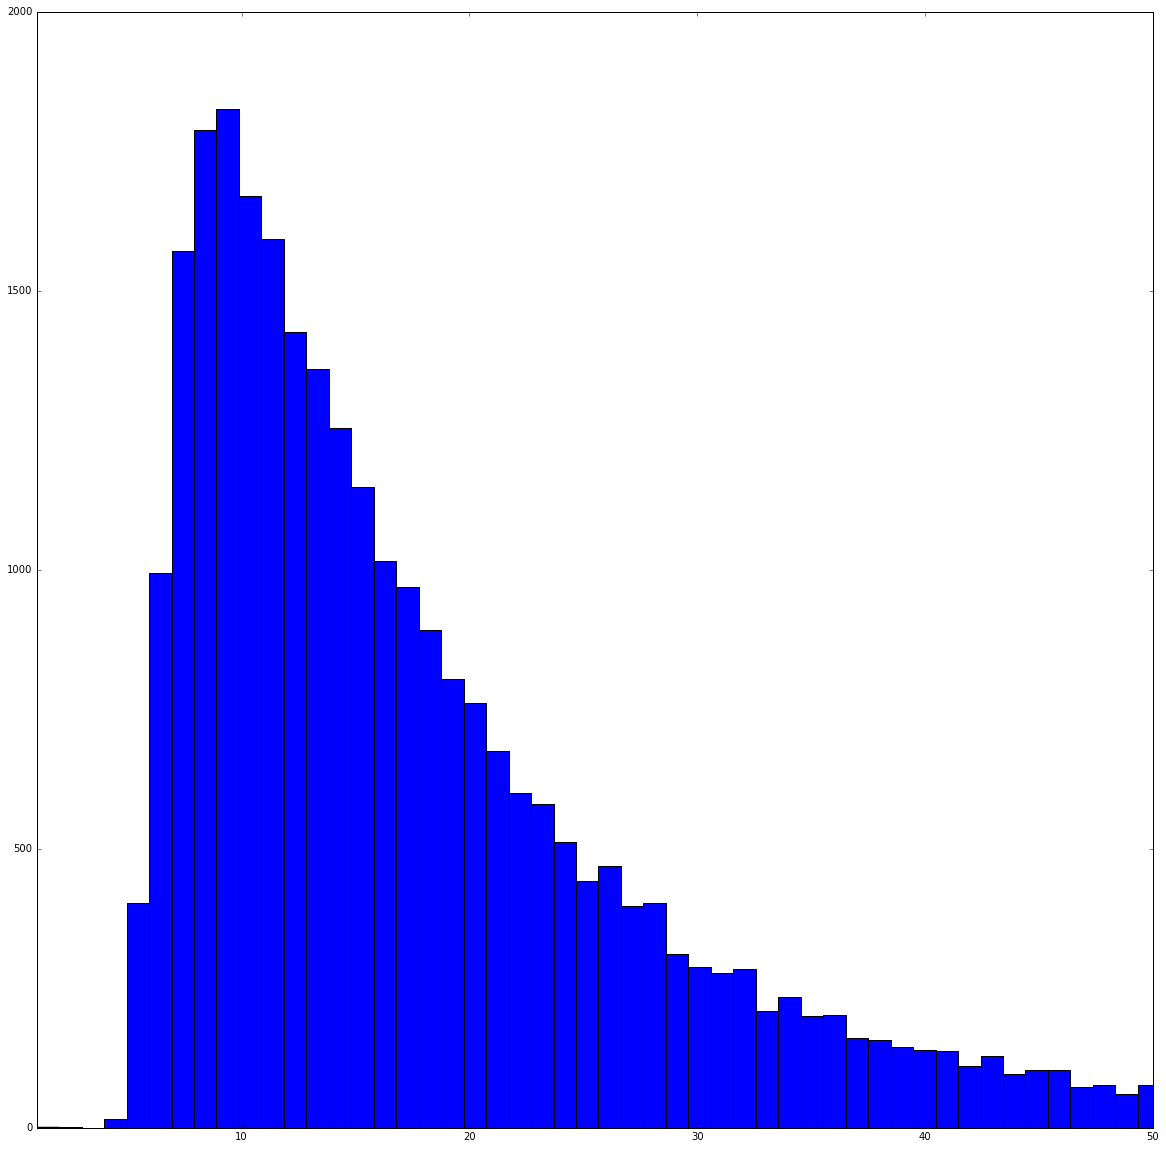

16622
297
['добрый', 'день', 'узнал', 'тут', 'о', '"техническом', 'сбое"', 'который', 'вроде', 'как', 'был', 'в', 'банке', 'пару', 'дней', 'назад', 'из', 'за', 'которого', 'обычным', 'нормальным', 'клиентам', 'заблокировали', 'дистанционное', 'обслуживание', 'сижу', 'вот', 'теперь', 'в', 'небольшом', 'шоке', 'и', 'честно', 'говоря', 'несколько', 'нарушен', 'ситуацией', 'как', 'вообще', 'такое', 'могло', 'произойти', 'и', 'какие', 'теперь', 'гарантии', 'что', 'подобное', 'не', 'произойдёт', 'и', 'со', 'мной', 'надеюсь', 'на', 'ответ', 'старшего', 'специалиста'] -495.74389 0.82583 0.18212
['здравствуйте'] -4.61557 0.04568 0.0098
['упс', 'не', 'нарушен', 'а', 'напуган'] -50.15888 0.09333 0.02076
['последствия', 'сбоя', 'были', 'оперативно', 'устранены', 'ограничение', 'дистанционного', 'обслуживание', 'мы', 'вводим', 'только', 'при', 'наличии', 'на', 'то', 'оснований'] -146.71845 0.1651 0.03363
['и', 'всё'] -12.50885 0.05677 0.01252
['во', 'первых', 'не', 'так', 'уж', 'и', 'оперативно', '

In [223]:
import math
import numpy as np
import matplotlib.pyplot as plt

words = dict()
all_words = 0
for sentence in sentences:
    for word in sentence:
        all_words += 1
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

for elem in words.keys():
    words[elem] = math.log(words[elem] / all_words)
    
lens = [len(chat) for chat in chats]
plt.figure(figsize=(20, 20))
plt.xlim(xmin=1, xmax=50)
plt.hist(lens, bins=300)
plt.show()

print(np.argmax(np.array(lens)))

#for idx in range(20, 50):
cur_chat = chats[16622]
print(len(cur_chat))
for sentence in cur_chat:
    log_prob = 0
    entropy = 0
    gini = 0
    for word in sentence:
        log_prob += words[word]
        entropy -= words[word] * math.exp(words[word])
        gini += math.exp(words[word]) * (1 - math.exp(words[word]))
    print(sentence, round(log_prob, 5), round(entropy, 5), round(gini, 5))
print()

In [218]:
for line in chats[16622]:
    print(" ".join(line))

добрый день узнал тут о "техническом сбое" который вроде как был в банке пару дней назад из за которого обычным нормальным клиентам заблокировали дистанционное обслуживание сижу вот теперь в небольшом шоке и честно говоря несколько нарушен ситуацией как вообще такое могло произойти и какие теперь гарантии что подобное не произойдёт и со мной надеюсь на ответ старшего специалиста
здравствуйте
упс не нарушен а напуган
последствия сбоя были оперативно устранены ограничение дистанционного обслуживание мы вводим только при наличии на то оснований
и всё
во первых не так уж и оперативно были они устранены давайте будем объективными
имя отчество банк имеет право ограничить дистанционное обслуживание информация об этом есть в er<j/
укбо
во вторых представители банка вообще говорили что решения принята на основании каких то пунктов условий обслуживания которые суд уже признал незаконными
и затем "увы решение пересмотру не подлежит "
это как вообще
это вот такое отношения банка к лояльным клиента

In [120]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1, sg=1, size=200, iter=8, workers=4)

In [121]:
model.most_similar(['карта'])

[('дебетовая', 0.7837350368499756),
 ('кредитная', 0.7288051247596741),
 ('рублевая', 0.6853181719779968),
 ('виртуальная', 0.6527940034866333),
 ('карточка', 0.6482224464416504),
 ('валютная', 0.6476641893386841),
 ('выпущена', 0.6411604881286621),
 ('заблокирована', 0.6320291757583618),
 ('перевыпущенная', 0.6306322813034058),
 ('активирована', 0.6236859560012817)]

In [158]:
model.most_similar(positive=['блонд', 'вопрос'], negative=[])

[('лайки', 0.7922518253326416),
 ('обжаловать', 0.7867491245269775),
 ('"рассмотрению"', 0.7830104231834412),
 ('наткнуться', 0.7827651500701904),
 ('родили', 0.7825422883033752),
 ('расстроился', 0.7815518379211426),
 ('обдираловки', 0.7814565896987915),
 ('вопром', 0.7810412645339966),
 ('уточнать', 0.7798020839691162),
 ('торопят', 0.7788264751434326)]

In [164]:
model.doesnt_match(["", "кредитная", "дебетовая", "карта"])

'банк'

In [165]:
model.most_similar(['изъять'])

[('вывести', 0.714593768119812),
 ('изымать', 0.669033408164978),
 ('изымаете', 0.6518428921699524),
 ('изъяли', 0.6512863636016846),
 ('средства1', 0.6250762343406677),
 ('перевести', 0.6152870655059814),
 ('изымите', 0.6139361262321472),
 ('переведете', 0.6119550466537476),
 ('поступившую', 0.6117496490478516),
 ('переведенную', 0.5980391502380371)]

In [179]:
from scipy.spatial.distance import cosine 
def relevance(phrase):
    ans = sum([model[word] for word in phrase])
    for word in phrase:
        print(word, 1 - cosine(model[word], ans))
string = """
Как узнать кредитный лимит по карте
Здравствуйте
Доброй ночи 
Сейчас проверю информацию, 1-1 минуты, пожалуйста. 
Жду, спасибо! 
Кредитный лимит по Вашей карте - 111 тысяч. Вы можете эту информацию посмотреть в приложении. 
Спасибо, а где в приложении? 
Для этого нужно выбрать карту в разделе "Счета". 
Далее нажать меню в правом верхнем углу. 
Спасибо! Супер! 
Рад помочь! Удачи Вам и всего доброго!
""".lower()
string = " ".join(re.split(r"[\(\)-\.!?\s]+", string))
print(string)
relevance(string.split())

 как узнать кредитный лимит по карте здравствуйте доброй ночи сейчас проверю информацию 1 1 минуты пожалуйста жду спасибо кредитный лимит по вашей карте 111 тысяч вы можете эту информацию посмотреть в приложении спасибо а где в приложении для этого нужно выбрать карту в разделе "счета" далее нажать меню в правом верхнем углу спасибо супер рад помочь удачи вам и всего доброго 
как 0.520659037088
узнать 0.526173628831
кредитный 0.508053718692
лимит 0.513312941602
по 0.539146588713
карте 0.550655852088
здравствуйте 0.547327298606
доброй 0.590043880599
ночи 0.517373147653
сейчас 0.605525833231
проверю 0.595267208653
информацию 0.595682060604
1 0.569610360739
1 0.569610360739
минуты 0.568633441506
пожалуйста 0.621344547647
жду 0.400422791356
спасибо 0.571463339256
кредитный 0.508053718692
лимит 0.513312941602
по 0.539146588713
вашей 0.492158218098
карте 0.550655852088
111 0.516834143521
тысяч 0.507252646703
вы 0.541837858386
можете 0.565875162058
эту 0.486023992358
информацию 0.595682060604

In [170]:
model.most_similar(positive=['один', 'момент', 'уточняю'])

[('профильм', 0.6872949004173279),
 ('исправлюсь', 0.656134307384491),
 ('уточнении', 0.6490548849105835),
 ('сойдет', 0.6454126834869385),
 ('неизменны', 0.6421858072280884),
 ('безработная', 0.6403404474258423),
 ('расследований', 0.6371269226074219),
 ('задступ', 0.6345673203468323),
 ('оставйтесь', 0.6342647671699524),
 ('храни', 0.6337534785270691)]